### Importing Libraries:

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the Dataset:
#### df = pd.read_csv('predictive_maintenance_dataset.csv'): This line reads the dataset from a CSV file and stores it in a pandas DataFrame called df.

In [103]:
data = pd.read_csv("predictive_maintenance_dataset.csv")

In [104]:
data.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [106]:
data.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


In [107]:
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

In [108]:
data.nunique()

date          304
device       1169
failure         2
metric1    123877
metric2       560
metric3        48
metric4       115
metric5        60
metric6     44838
metric7        28
metric8        28
metric9        67
dtype: int64

In [109]:
data.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

##### Note initially that there is no missing data in any variable

### Function to add extra features

In [110]:
def extra_features(data):
    # datetime features
    df = data.copy()
    df['day']       = df['date'].dt.day
    df['month']     = df['date'].dt.month
    df['year']      = df['date'].dt.year
    df['day_week']  = df['date'].dt.weekday
    df['weekmonth'] = (df['day'] - 1) // 7 + 1
    
    # devices features
    df['sector']     = df['device'].str[:4]
    df['equipment']  = df['device'].str[4:]
    return df

In [111]:
df = extra_features(data)
df.nunique()

date            304
device         1169
failure           2
metric1      123877
metric2         560
metric3          48
metric4         115
metric5          60
metric6       44838
metric7          28
metric8          28
metric9          67
day              31
month            11
year              1
day_week          7
weekmonth         5
sector            7
equipment      1169
dtype: int64

## Exploratory Data Analysis (EDA)

##### Evaluating the distribution of failures

<Axes: xlabel='failure', ylabel='count'>

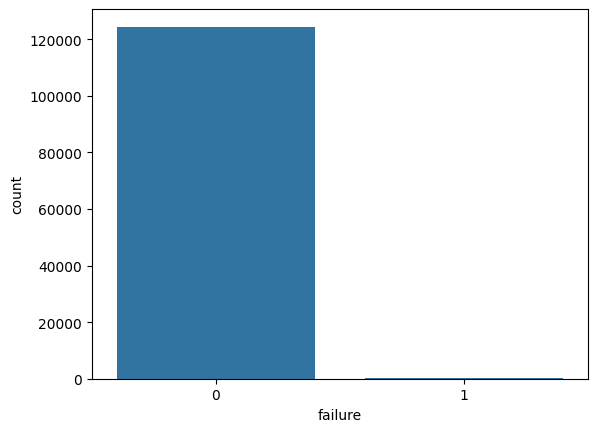

In [112]:
sns.countplot(data = df,x = 'failure')

##### The graph shows a much higher proportion of normal data than failure data. Subsequently, an operation will be carried out to balance these classes of this objective variable.

##### As the occurrence of failures is very low, could it be that all the 'devices' listed have failed?df[df['failure'] == 1].device.nunique()

In [113]:
df[df['failure'] == 1].device.nunique()

106

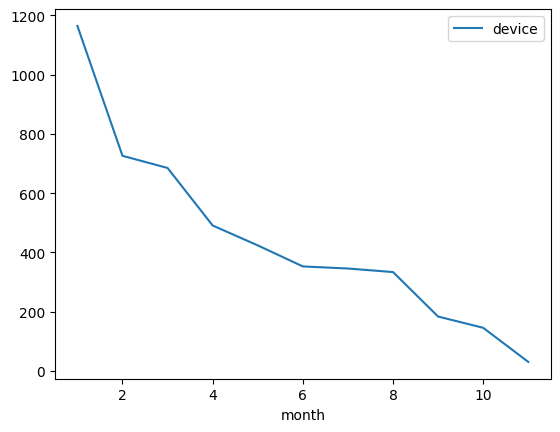

In [114]:
df.groupby('month').agg({'device':lambda x: x.nunique()}).plot()
plt.show()

#### This figure shows that as time move on, the number of devices are getting less and less.

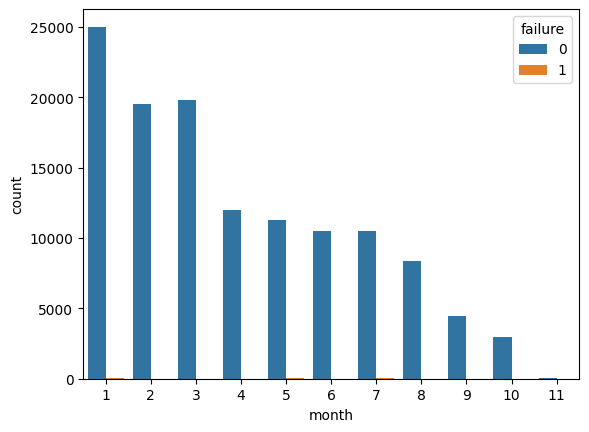

In [115]:
ax = sns.countplot(x="month", hue="failure", data=df)
plt.show()

#### This figure shows most of the devices failed in the first month

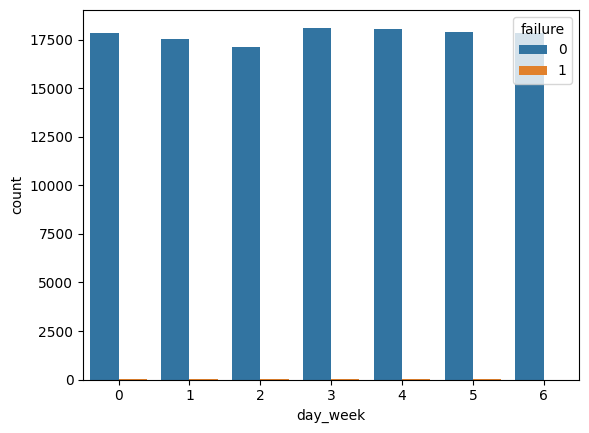

In [116]:
ax = sns.countplot(x='day_week',hue='failure',data=df)
plt.show()

#### This figure shows that there is no device fails on Saturday. Maybe they don't work on the this day.

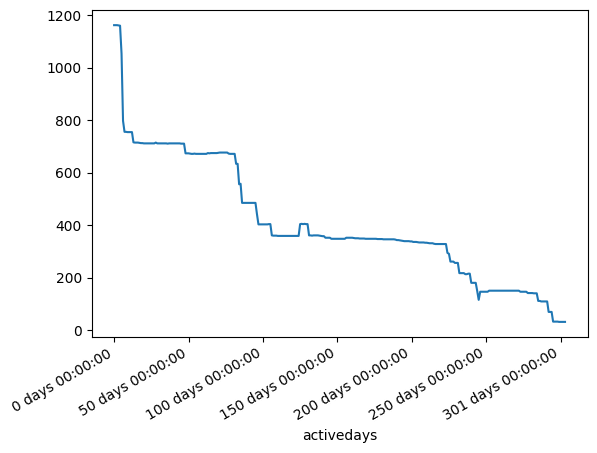

In [117]:
df['activedays']=df.date-df.date[0]
df.groupby('activedays')['device'].count().plot()
plt.show()

#### One can see that the number of devices decreases as time goes by. And there is a big jump in the middle of activedays. Those may be some devices got put back in after they failed and fixed well. We will investigate the detail later.

In [118]:
max(df.date), min(df.date)

(Timestamp('2015-11-02 00:00:00'), Timestamp('2015-01-01 00:00:00'))

#### All of these data are collected between 11/02/2015 and 01/01/2015

Distribution for failure is 1


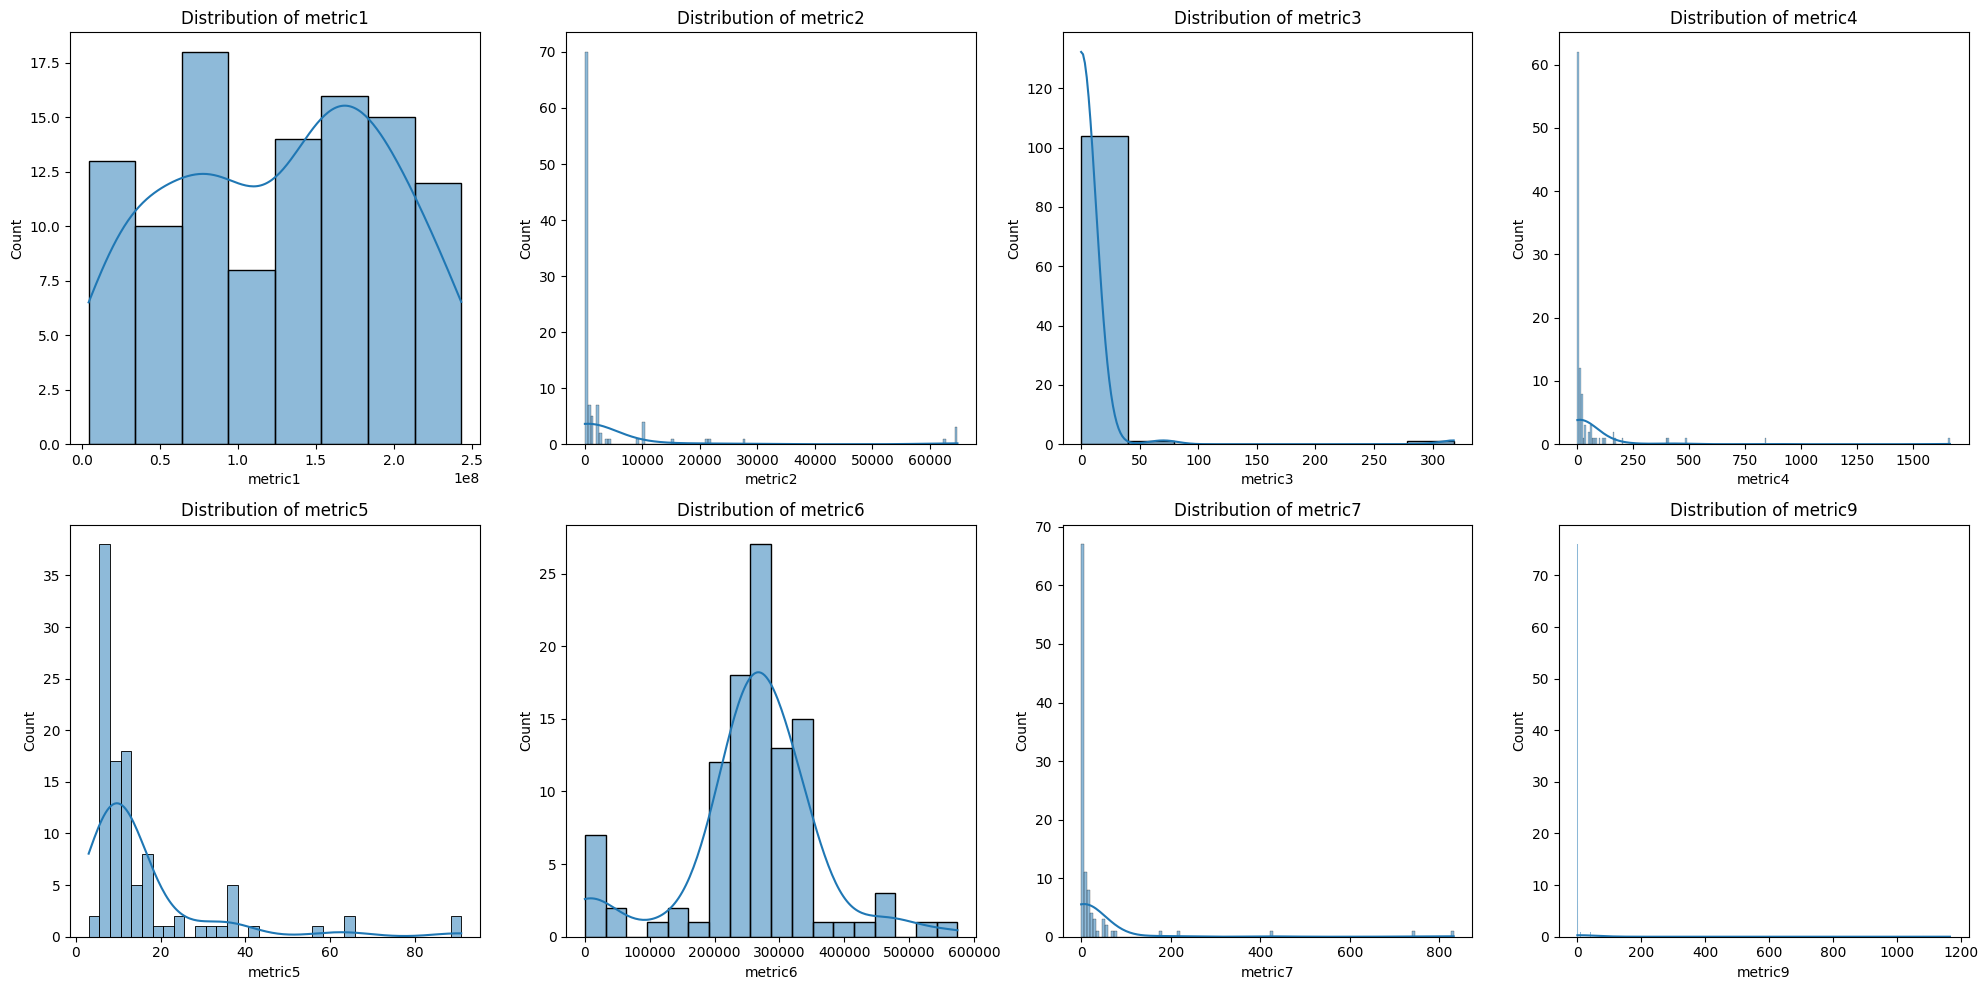

In [119]:

plt.figure(figsize=(20, 10))
print("Distribution for failure is 1")
mask= df.failure>0
for i, col in enumerate(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric9']):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df.loc[mask], x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

#### Create histograms to visualize the distribution of selected metrics with 'failure' as hue

Text(0.5, 1.0, 'Correlation Matrix')

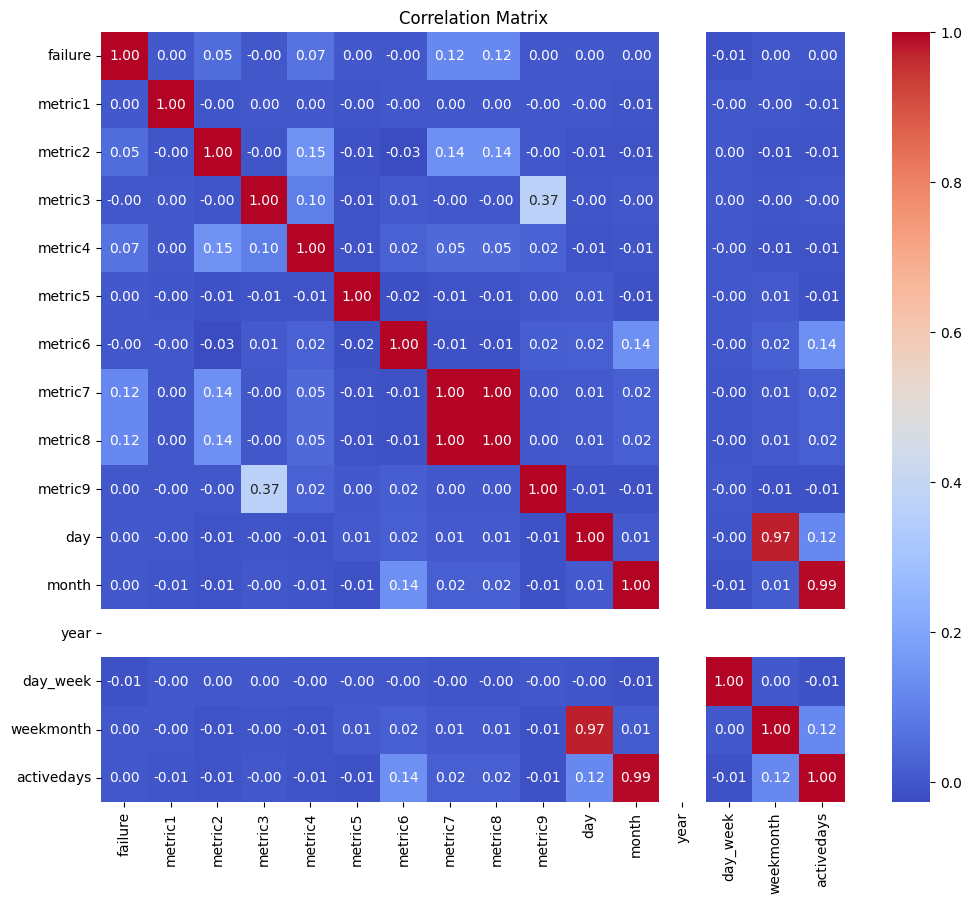

In [120]:
# Select only numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")

C:\Users\moham.MSI-KATANA\AppData\Local\Temp\ipykernel_25412\164826097.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_week', palette='Set3')
C:\Users\moham.MSI-KATANA\AppData\Local\Temp\ipykernel_25412\164826097.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', palette='Set3')
C:\Users\moham.MSI-KATANA\AppData\Local\Temp\ipykernel_25412\164826097.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day', palette='Set3')


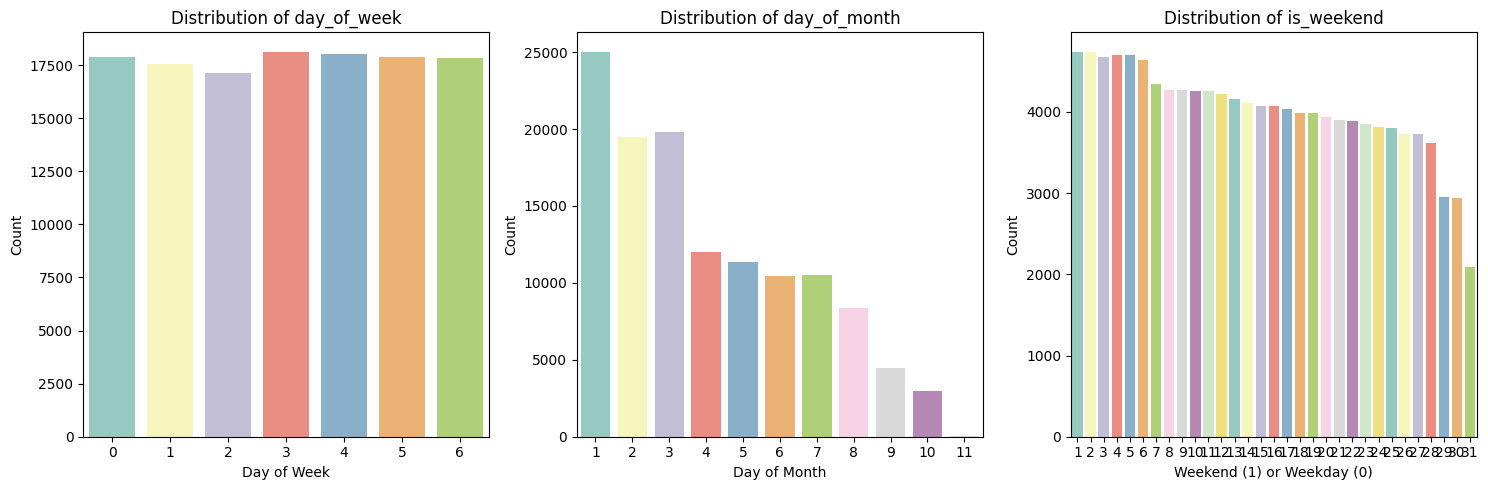

In [121]:
# Create subplots to visualize the distribution of day_of_week, day_of_month, and is_weekend
plt.figure(figsize=(15, 5))

# Distribution of 'day_of_week'
plt.subplot(131)
sns.countplot(data=df, x='day_week', palette='Set3')
plt.title("Distribution of day_of_week")
plt.xlabel("Day of Week")
plt.ylabel("Count")

# Distribution of 'day_of_month'
plt.subplot(132)
sns.countplot(data=df, x='month', palette='Set3')
plt.title("Distribution of day_of_month")
plt.xlabel("Day of Month")
plt.ylabel("Count")

# Distribution of 'is_weekend'
plt.subplot(133)
sns.countplot(data=df, x='day', palette='Set3')
plt.title("Distribution of is_weekend")
plt.xlabel("Weekend (1) or Weekday (0)")
plt.ylabel("Count")

# Show the subplots
plt.tight_layout()
plt.show()

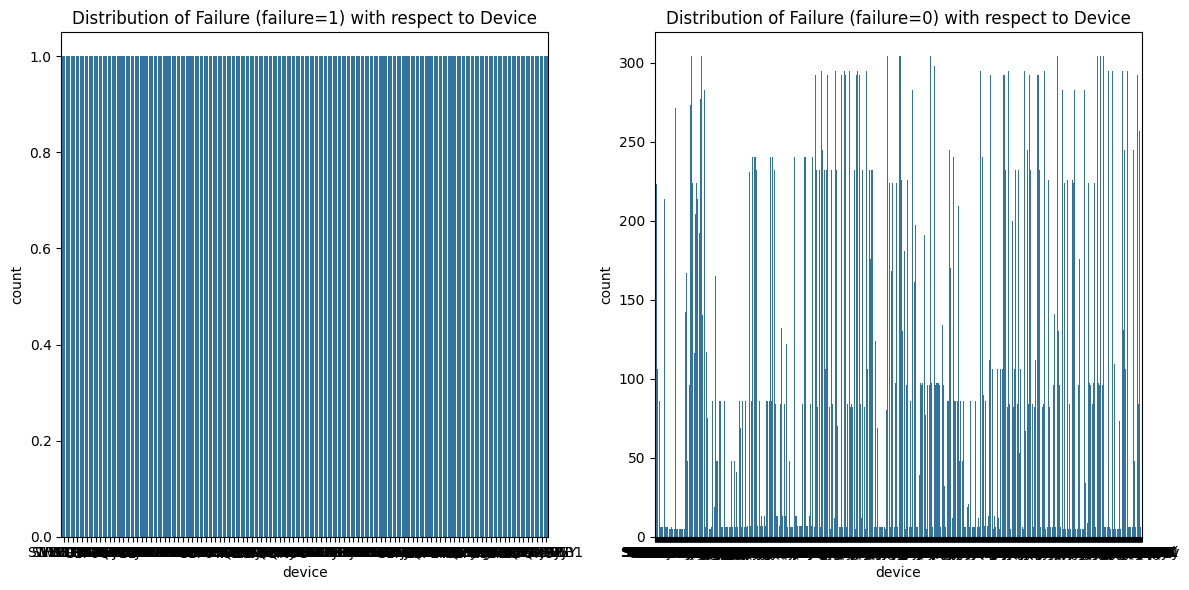

In [122]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))
# Plot the distribution of 'failure' with respect to 'device' for failure=1
plt.subplot(1, 2, 1)
sns.countplot(x="device", data=df.loc[df["failure"] == 1])
plt.title('Distribution of Failure (failure=1) with respect to Device')

# Plot the distribution of 'failure' with respect to 'device' for failure=0
plt.subplot(1, 2, 2)
sns.countplot(x="device", data=df.loc[df["failure"] == 0])
plt.title('Distribution of Failure (failure=0) with respect to Device')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Text(0.5, 1.0, 'Failure over Time by Month')

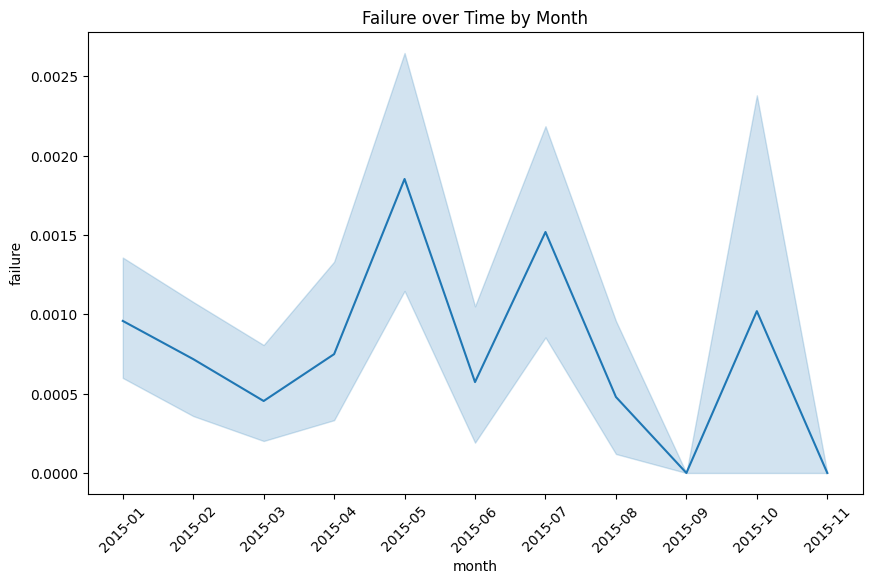

In [123]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract and format the 'month' column for plotting
df['month'] = df['date'].dt.to_period('M')
df['month'] = df['month'].dt.strftime('%Y-%m')

# Create a line plot to visualize 'failure' over time by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='failure')
plt.xticks(rotation=45)
plt.title("Failure over Time by Month")

In [124]:
data_cleaned = data.drop(columns=['device', 'date'])


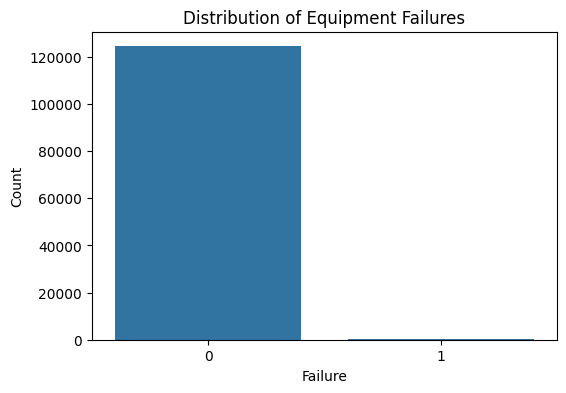

In [125]:
plt.figure(figsize=(6,4))
sns.countplot(x='failure', data=data_cleaned)
plt.title('Distribution of Equipment Failures')
plt.xlabel('Failure')
plt.ylabel('Count')
plt.show()

In [126]:
print("Summary statistics of metrics:\n", data_cleaned.describe())


Summary statistics of metrics:
              failure       metric1        metric2        metric3  \
count  124494.000000  1.244940e+05  124494.000000  124494.000000   
mean        0.000851  1.223881e+08     159.492706       9.940897   
std         0.029167  7.045933e+07    2179.677781     185.748131   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         0.000000  6.128476e+07       0.000000       0.000000   
50%         0.000000  1.227974e+08       0.000000       0.000000   
75%         0.000000  1.833096e+08       0.000000       0.000000   
max         1.000000  2.441405e+08   64968.000000   24929.000000   

             metric4        metric5        metric6        metric7  \
count  124494.000000  124494.000000  124494.000000  124494.000000   
mean        1.741120      14.222669  260172.657726       0.292528   
std        22.908507      15.943028   99151.078547       7.436924   
min         0.000000       1.000000       8.000000       0.000000   
25%       

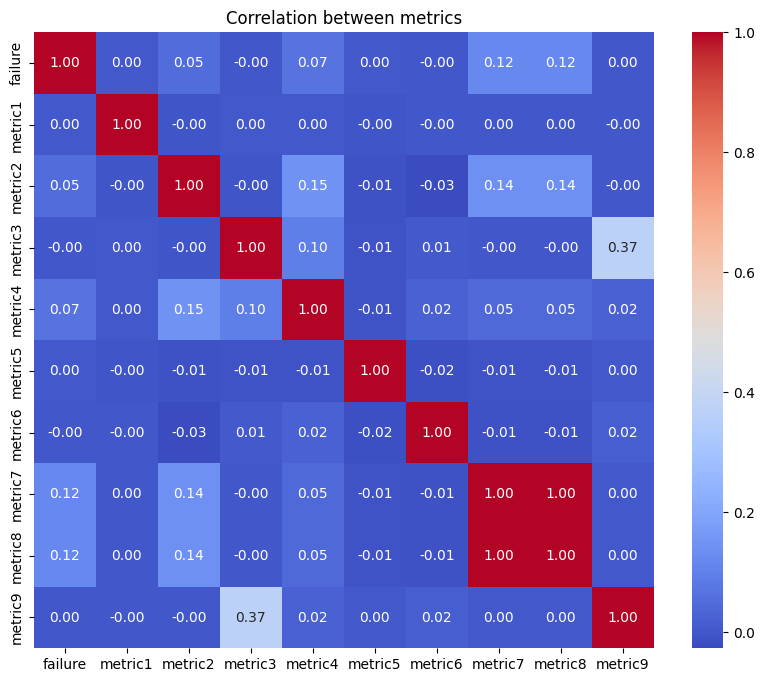

In [127]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between metrics')
plt.show()


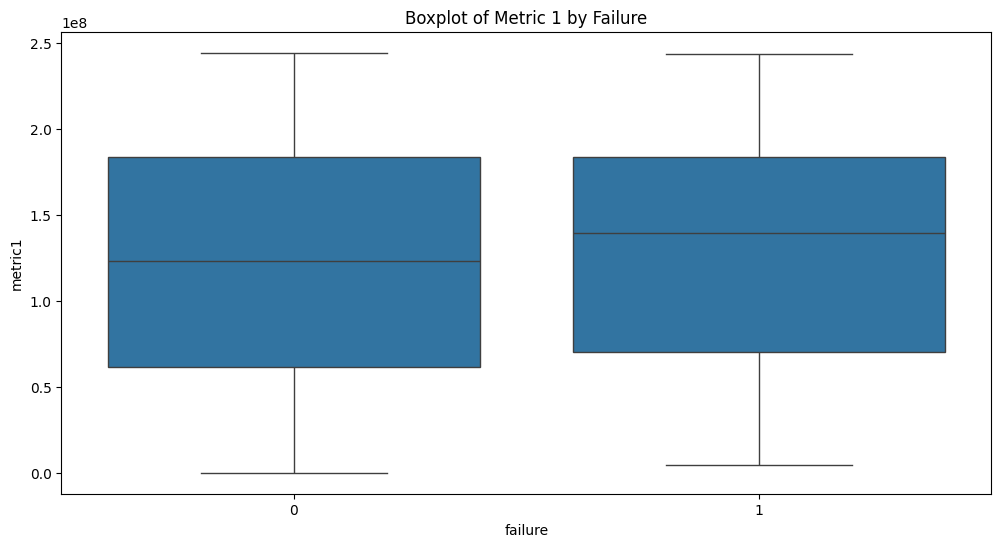

In [128]:
plt.figure(figsize=(12,6))
sns.boxplot(x='failure', y='metric1', data=data_cleaned)
plt.title('Boxplot of Metric 1 by Failure')
plt.show()

## Machine Learninig Model

In [129]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [130]:
X = data.drop(columns=['failure', 'device', 'date'])
y = data['failure']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest Accuracy: 0.9991967548897546
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24881
           1       0.00      0.00      0.00        18

    accuracy                           1.00     24899
   macro avg       0.50      0.50      0.50     24899
weighted avg       1.00      1.00      1.00     24899



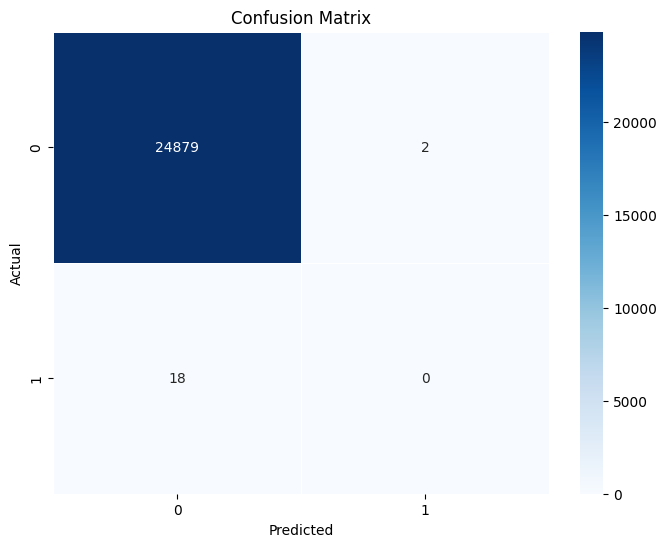

In [132]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

conf_mat = confusion_matrix(y_test, rf_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [133]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_y_pred))
print("Classification Report:\n", classification_report(y_test, gb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_y_pred))


Gradient Boosting Accuracy: 0.9992770794007791
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24881
           1       0.00      0.00      0.00        18

    accuracy                           1.00     24899
   macro avg       0.50      0.50      0.50     24899
weighted avg       1.00      1.00      1.00     24899

Confusion Matrix:
 [[24881     0]
 [   18     0]]


c:\Users\moham.MSI-KATANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moham.MSI-KATANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moham.MSI-KATANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

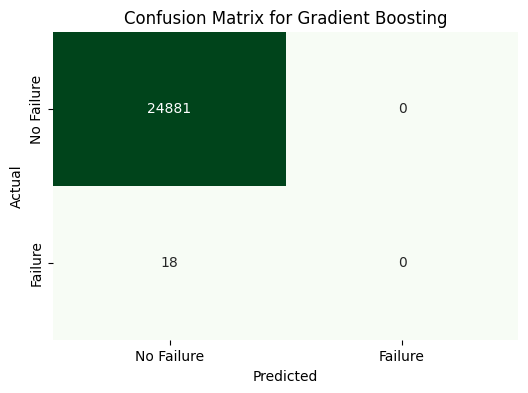

In [134]:
conf_matrix_gb = confusion_matrix(y_test, gb_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Greens', cbar=False, 
            xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

In [137]:
from sklearn.svm import SVC
svm_poly_model = SVC(kernel='poly', degree=3)
svm_poly_model.fit(X_train, y_train)


SVC(kernel='poly')

In [138]:
y_pred_poly_svm = svm_poly_model.predict(X_test)


In [139]:
cm = confusion_matrix(y_test, y_pred_poly_svm)


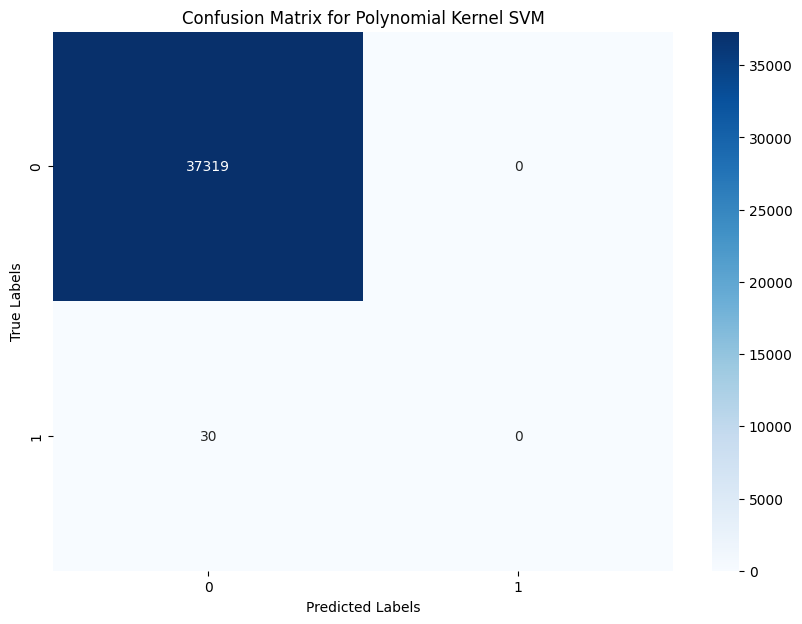

Polynomial Kernel SVM Accuracy:  0.9991967656429891
Classification Report for Polynomial Kernel SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37319
           1       0.00      0.00      0.00        30

    accuracy                           1.00     37349
   macro avg       0.50      0.50      0.50     37349
weighted avg       1.00      1.00      1.00     37349



c:\Users\moham.MSI-KATANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moham.MSI-KATANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\moham.MSI-KATANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [140]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), 
            yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Polynomial Kernel SVM')
plt.show()

# Print accuracy and classification report
print("Polynomial Kernel SVM Accuracy: ", accuracy_score(y_test, y_pred_poly_svm))
print("Classification Report for Polynomial Kernel SVM:\n", classification_report(y_test, y_pred_poly_svm))

In [141]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Vectorization
vectorizer = CountVectorizer()
X = data_cleaned.drop(columns=['failure'])  
y = data_cleaned['failure']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24881
           1       0.00      0.00      0.00        18

    accuracy                           1.00     24899
   macro avg       0.50      0.50      0.50     24899
weighted avg       1.00      1.00      1.00     24899



## NLP

In [142]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def create_log(row):
    device = row['device']
    date = row['date']
    failure = row['failure']
    
    metrics_log = ', '.join([f"{col}: {row[col]}" for col in data.columns if 'metric' in col])
    if failure == 1:
        return f"Failure detected in device {device} on {date}. Metrics: {metrics_log}."
    else:
        return f"Normal operation for device {device} on {date}. Metrics: {metrics_log}."

data['log'] = data.apply(create_log, axis=1)

def preprocess_log(log):
    tokens = word_tokenize(log.lower())
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

data['cleaned_logs'] = data['log'].apply(preprocess_log)

print(data[['log', 'cleaned_logs']].head())


[nltk_data] Downloading package punkt to C:\Users\moham.MSI-
[nltk_data]     KATANA/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\moham.MSI-
[nltk_data]     KATANA/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\moham.MSI-
[nltk_data]     KATANA/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                 log  \
0  Normal operation for device S1F01085 on 2015-0...   
1  Normal operation for device S1F0166B on 2015-0...   
2  Normal operation for device S1F01E6Y on 2015-0...   
3  Normal operation for device S1F01JE0 on 2015-0...   
4  Normal operation for device S1F01R2B on 2015-0...   

                     cleaned_logs  
0  normal operation device metric  
1  normal operation device metric  
2  normal operation device metric  
3  normal operation device metric  
4  normal operation device metric  


In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['cleaned_logs'])

feature_names = vectorizer.get_feature_names_out()
feature_names
# most important words

array(['detected', 'device', 'failure', 'metric', 'normal', 'operation'],
      dtype=object)

In [144]:
from gensim.models import Word2Vec

sentences = [row.split() for row in data['cleaned_logs']]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

vector = model.wv['device']
vector

array([-0.2526151 , -0.01765856,  0.27838102,  0.30196545,  0.2531907 ,
       -0.24064718,  0.005299  ,  0.11527482, -0.17009872, -0.17847936,
       -0.17521141, -0.44990173, -0.3852743 ,  0.43040797, -0.03622136,
        0.43160155,  0.06550717,  0.3639199 ,  0.10754311, -0.09046908,
        0.10352077, -0.13230495,  0.15956436, -0.5600781 ,  0.41012245,
        0.1334392 , -0.41495523,  0.0487425 , -0.04761089,  0.2689251 ,
        0.41550836, -0.0464802 ,  0.15380251, -0.15939817,  0.17717978,
       -0.05025333,  0.09273866,  0.38641602,  0.60445243,  0.24687056,
        0.35803455, -0.44938016, -0.5023734 ,  0.00825326, -0.31554282,
        0.2642297 ,  0.23092756, -0.04327052,  0.1527507 ,  0.12154295,
        0.2830889 , -0.42158425,  0.21292536,  0.3753675 ,  0.12391901,
        0.42434064,  0.3729346 ,  0.15519045, -0.09327413,  0.45792255,
       -0.42855877,  0.0712024 , -0.42286947, -0.20156124,  0.13174112,
        0.27072164,  0.30947253, -0.4868631 ,  0.4535643 ,  0.45

In [145]:
from textblob import TextBlob

def analyze_sentiment(log):
    analysis = TextBlob(log)
    return analysis.sentiment.polarity

data['sentiment'] = data['log'].apply(analyze_sentiment)

print(data[['log', 'sentiment']].head())


                                                 log  sentiment
0  Normal operation for device S1F01085 on 2015-0...      0.150
1  Normal operation for device S1F0166B on 2015-0...      0.325
2  Normal operation for device S1F01E6Y on 2015-0...      0.150
3  Normal operation for device S1F01JE0 on 2015-0...      0.150
4  Normal operation for device S1F01R2B on 2015-0...      0.325


In [146]:
from gensim import corpora
from gensim.models import LdaModel
import nltk

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_for_lda(log):
    tokens = word_tokenize(log.lower())
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

data['tokens'] = data['log'].apply(preprocess_for_lda)

dictionary = corpora.Dictionary(data['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in data['tokens']]

num_topics = 5 
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# Common types of failures.
# Factors affecting performance.
# General trends in the data.

[nltk_data] Downloading package punkt to C:\Users\moham.MSI-
[nltk_data]     KATANA/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\moham.MSI-
[nltk_data]     KATANA/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 0: 0.250*"normal" + 0.250*"operation" + 0.250*"device" + 0.250*"metrics" + 0.000*"detected" + 0.000*"failure"
Topic 1: 0.250*"normal" + 0.250*"operation" + 0.250*"device" + 0.250*"metrics" + 0.000*"detected" + 0.000*"failure"
Topic 2: 0.250*"normal" + 0.250*"operation" + 0.250*"device" + 0.250*"metrics" + 0.000*"detected" + 0.000*"failure"
Topic 3: 0.250*"device" + 0.250*"metrics" + 0.249*"normal" + 0.249*"operation" + 0.001*"detected" + 0.001*"failure"
Topic 4: 0.250*"normal" + 0.250*"operation" + 0.250*"device" + 0.250*"metrics" + 0.000*"detected" + 0.000*"failure"


In [147]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_log(log):
    log = log.lower()
    
    log = re.sub(r'[^a-z\s]', '', log)
    
    tokens = word_tokenize(log)
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return " ".join(tokens)

def process_user_input(logs):
    cleaned_logs = [preprocess_log(log) for log in logs]
    
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(cleaned_logs)
    
    return tfidf_matrix, vectorizer.get_feature_names_out()

user_logs = [
    "Device detected a failure at 10:30 PM.",
    "System is operating under normal conditions.",
    "Metric reading shows unusual spikes."
]

tfidf_matrix, feature_names = process_user_input(user_logs)

print("TF-IDF Matrix:\n", tfidf_matrix.toarray())
print("Feature Names:\n", feature_names)


TF-IDF Matrix:
 [[0.        0.5       0.5       0.5       0.        0.        0.
  0.5       0.        0.        0.        0.        0.       ]
 [0.5       0.        0.        0.        0.        0.5       0.5
  0.        0.        0.        0.        0.5       0.       ]
 [0.        0.        0.        0.        0.4472136 0.        0.
  0.        0.4472136 0.4472136 0.4472136 0.        0.4472136]]
Feature Names:
 ['condition' 'detected' 'device' 'failure' 'metric' 'normal' 'operating'
 'pm' 'reading' 'show' 'spike' 'system' 'unusual']


[nltk_data] Downloading package punkt to C:\Users\moham.MSI-
[nltk_data]     KATANA/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\moham.MSI-
[nltk_data]     KATANA/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\moham.MSI-
[nltk_data]     KATANA/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Gans

In [148]:
import torch
import torch.nn as nn
import numpy as np
import mlflow
import mlflow.pytorch
import torch.optim as optim

In [149]:
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)  
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.tanh(self.fc3(x))  
        return x

In [150]:
class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)  
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)  
        self.fc3 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.3)  

    def forward(self, x):
        x = self.dropout(self.relu(self.bn1(self.fc1(x))))
        x = self.dropout(self.relu(self.bn2(self.fc2(x))))
        x = self.sigmoid(self.fc3(x)) 
        return x

In [151]:
def generate_real_data(num_samples, num_features):
    real_data = np.random.normal(0, 1, (num_samples, num_features))  
    return torch.Tensor(real_data)

In [152]:
def generate_noise(num_samples, noise_dim):
    return torch.randn(num_samples, noise_dim)

In [153]:
def train_gan(generator, discriminator, real_data, noise_dim, num_epochs=10000, batch_size=64, lr_g=0.0001, lr_d=0.0001): 
    loss_fn = nn.BCELoss()
    optimizer_g = torch.optim.Adam(generator.parameters(), lr=lr_g)
    optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=lr_d)

    num_samples, num_features = real_data.shape

    with mlflow.start_run():
        for epoch in range(num_epochs):
            for _ in range(1):  
                idx = np.random.randint(0, num_samples, batch_size)
                real_batch = real_data[idx]

                real_labels = torch.ones(batch_size, 1)
                pred_real = discriminator(real_batch)
                loss_real = loss_fn(pred_real, real_labels)

                noise = generate_noise(batch_size, noise_dim)
                fake_batch = generator(noise)
                fake_labels = torch.zeros(batch_size, 1)
                pred_fake = discriminator(fake_batch.detach())
                loss_fake = loss_fn(pred_fake, fake_labels)

                loss_d = (loss_real + loss_fake) / 2
                optimizer_d.zero_grad()
                loss_d.backward()
                optimizer_d.step()

            noise = generate_noise(batch_size, noise_dim)
            fake_batch = generator(noise)
            pred_fake = discriminator(fake_batch)
            loss_g = loss_fn(pred_fake, real_labels)

            optimizer_g.zero_grad()
            loss_g.backward()
            optimizer_g.step()

            mlflow.log_metric("D_loss", loss_d.item(), step=epoch)
            mlflow.log_metric("G_loss", loss_g.item(), step=epoch)

            if epoch % 1000 == 0:
                print(f"Epoch {epoch}/{num_epochs} | D Loss: {loss_d.item():.4f} | G Loss: {loss_g.item():.4f}")

        mlflow.pytorch.log_model(generator, "generator_model")
        mlflow.pytorch.log_model(discriminator, "discriminator_model")

In [154]:
noise_dim = 100  
hidden_size = 64  
num_features = 5  

generator = Generator(input_size=noise_dim, hidden_size=hidden_size, output_size=num_features)
discriminator = Discriminator(input_size=num_features, hidden_size=hidden_size)

num_samples = 1000
real_data = generate_real_data(num_samples, num_features)

train_gan(generator, discriminator, real_data, noise_dim, num_epochs=10000, batch_size=64)

Epoch 0/10000 | D Loss: 0.7009 | G Loss: 0.7522
Epoch 1000/10000 | D Loss: 0.6875 | G Loss: 0.6852
Epoch 2000/10000 | D Loss: 0.7000 | G Loss: 0.7012
Epoch 3000/10000 | D Loss: 0.6916 | G Loss: 0.7025
Epoch 4000/10000 | D Loss: 0.6903 | G Loss: 0.6910
Epoch 5000/10000 | D Loss: 0.6915 | G Loss: 0.6960
Epoch 6000/10000 | D Loss: 0.6940 | G Loss: 0.6950
Epoch 7000/10000 | D Loss: 0.6906 | G Loss: 0.6928
Epoch 8000/10000 | D Loss: 0.6911 | G Loss: 0.6941
Epoch 9000/10000 | D Loss: 0.6942 | G Loss: 0.6925


2024/10/23 18:00:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/23 18:00:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## Computer Vision

In [155]:
import os 

TRAIN_DIR="OIDv4_ToolKit/OID/Dataset/train"

os.listdir(TRAIN_DIR)

HAMMER_DIR=os.path.join(TRAIN_DIR,"OIDv4_ToolKit/OID/Dataset/train/Hammer")
SCREWDRIVER_DIR=os.path.join(TRAIN_DIR,"OIDv4_ToolKit/OID/Dataset/train/Screwdriver")
WRENCH_DIR=os.path.join(TRAIN_DIR,"OIDv4_ToolKit/OID/Dataset/train/Wrench")

In [156]:
import os 

TEST_DIR="OIDv4_ToolKit/OID/Dataset/train"

os.listdir(TEST_DIR)

HAMMER_DIR=os.path.join(TRAIN_DIR,"OIDv4_ToolKit/OID/Dataset/train/Hammer")
SCREWDRIVER_DIR=os.path.join(TRAIN_DIR,"OIDv4_ToolKit/OID/Dataset/train/Screwdriver")
WRENCH_DIR=os.path.join(TRAIN_DIR,"OIDv4_ToolKit/OID/Dataset/train/Wrench")

In [157]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import cv2
import numpy as np
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_dataset = datasets.ImageFolder(root='OIDv4_ToolKit/OID/Dataset/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, len(train_dataset.classes))  

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, criterion, optimizer, num_epochs=20): 
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

train_model(model, train_loader, criterion, optimizer, num_epochs=20)

torch.save(model.state_dict(), 'cnn_model.pth')

model = SimpleCNN()
model.load_state_dict(torch.load('cnn_model.pth'))
model.to(device)
model.eval()

cap = cv2.VideoCapture(0)
class_names = ['Hammer', 'Screwdriver', 'Wrench']

while True:
    ret, frame = cap.read()
    if not ret:
        break

    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)  
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    label = class_names[predicted.item()]
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Epoch [1/20], Loss: 1.0488
Epoch [2/20], Loss: 0.9446
Epoch [3/20], Loss: 0.8844
Epoch [4/20], Loss: 0.8027
Epoch [5/20], Loss: 0.7215
Epoch [6/20], Loss: 0.6299
Epoch [7/20], Loss: 0.4915
Epoch [8/20], Loss: 0.4580
Epoch [9/20], Loss: 0.3172
Epoch [10/20], Loss: 0.2274
Epoch [11/20], Loss: 0.1555
Epoch [12/20], Loss: 0.1049
Epoch [13/20], Loss: 0.0841
Epoch [14/20], Loss: 0.0503
Epoch [15/20], Loss: 0.0766
Epoch [16/20], Loss: 0.0544
Epoch [17/20], Loss: 0.0400
Epoch [18/20], Loss: 0.0193
Epoch [19/20], Loss: 0.0272
Epoch [20/20], Loss: 0.0255


C:\Users\moham.MSI-KATANA\AppData\Local\Temp\ipykernel_25412\2054792485.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('cnn_model.pth'